In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns

In [3]:
usnews = pd.read_csv('usnews.data')
usnews = usnews.drop(['1Q math sat','3Q math sat','1Q verbal sat','3Q verbal sat','1Q act','3Q act'],axis=1)
pd.set_option('display.max_columns', None)
display(usnews)

# No unit for monetory figures.

,fice,college name,state(postal code),pub(1)-pvt(2),avg math sat,avg verbal sat,avg combined sat,avg act,#applications received,#applicants accepted,#new students enrolled,%new students (top 10% hs class),%new students (top 25% hs class),#fulltime ug,#parttime ug,in-state tuition,out-of-state tuition,room-board costs,room costs,board costs,additional fees,est. book costs,est. personal spending,%faculty with phd,%faculty with terminal degree,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
0,1061,Alaska Pacific University,AK,2,490,482,972,20,193,146,55,16,44,249,869,7560,7560,4120,1620,2500,130,800,1500,76,72,11.9,2,10922,15
1,1063,University of Alaska at Fairbanks,AK,1,499,462,961,22,1852,1427,928,*,*,3885,4519,1742,5226,3590,1800,1790,155,650,2304,67,*,10.0,8,11935,*
2,1065,University of Alaska Southeast,AK,1,*,*,*,*,146,117,89,4,24,492,1849,1742,5226,4764,2514,2250,34,500,1162,39,51,9.5,*,9584,39
3,11462,University of Alaska at Anchorage,AK,1,459,422,881,20,2065,1598,1162,*,*,6209,10537,1742,5226,5120,2600,2520,114,580,1260,48,*,13.7,6,8046,*
4,1002,Alabama Agri. & Mech. Univ.,AL,1,*,*,*,17,2817,1920,984,*,*,3958,305,1700,3400,2550,1108,1442,155,500,850,53,53,14.3,*,7043,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3826,West Virginia State College,WV,1,*,*,*,18,1869,*,957,*,*,2817,1939,1988,4616,3200,1500,1700,50,750,750,38,38,19.2,4,3839,*
1298,3827,West Virginia University,WV,1,507,439,946,22,9630,7801,2881,23,49,14524,1053,2128,6370,4310,2284,2026,*,*,*,83,86,13.4,*,8318,57
1299,3830,West Virginia Wesleyan College,WV,2,489,439,928,23,1566,1400,483,28,55,1509,170,14200,14200,3775,1750,2025,*,450,1100,58,81,16.4,42,8080,67
1300,3831,Wheeling Jesuit College,WV,2,479,433,912,22,903,755,213,15,49,971,305,10500,10500,4545,2100,2445,*,600,600,66,71,14.1,27,7494,72


In [4]:
aaup = pd.read_csv('aaup.data')
display(aaup)
# All monetory figures in $100 measured yearly

,fice,college name,state (postal code),type (I or IIA or IIB),avg slry - full professors,avg slry - associate professors,avg slry - assistant professors,avg slry - all ranks,avg compensation - full professors,avg compensation - associate professors,avg compensation - assistant professors,avg compensation - all ranks,#full professors,#associate professors,#assistant professors,#instructors,#faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,530,444,376,423,59,77,102,24,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,502,419,369,431,54,43,29,11,137
1157,3827,West Virginia University,WV,I,535,431,361,439,642,521,438,529,335,237,272,22,895
1158,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,572,494,434,495,25,22,24,3,74
1159,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,486,416,348,381,8,20,25,12,65


In [5]:
### l is the list of schools that are NOT COMMON in both the data sets ###
### Length of l is 366 ###
a = list(usnews.iloc[:,1])
b = list(aaup.iloc[:,1])
l = []
for i in b:
    if i not in a:
        l.append(i)

In [6]:
### Postal Codes ###
pc = list(usnews.iloc[:,2])
pc_distinct = list(set(pc))
pc_count = dict()
for i in pc_distinct:
    pc_count[i] = pc.count(i)
print(pc_count)


{'HI': 5, 'NH': 13, 'CT': 19, 'LA': 20, 'NM': 9, 'OK': 20, 'NE': 16, 'NV': 3, 'ND': 8, 'AK': 4, 'DE': 5, 'NY': 101, 'MD': 23, 'WA': 16, 'MS': 15, 'AZ': 5, 'WY': 1, 'TN': 34, 'MO': 35, 'IN': 42, 'VT': 14, 'IA': 29, 'NC': 46, 'DC': 9, 'AL': 25, 'PA': 83, 'OH': 52, 'OR': 18, 'MI': 36, 'SD': 11, 'SC': 26, 'ME': 14, 'KY': 24, 'VA': 40, 'NJ': 27, 'KS': 20, 'WI': 29, 'WV': 17, 'IL': 49, 'MT': 9, 'FL': 30, 'GA': 36, 'RI': 8, 'AR': 17, 'TX': 60, 'UT': 6, 'CA': 70, 'ID': 6, 'MA': 56, 'CO': 16, 'MN': 25}


In [7]:
coords = {'NM':(350,400),'IL':(630,270),'NY':(850,220),'OR':(125,200),'KY':(700,330),'WI':(620,190),'HI':(415,610),'LA':(590,470),'NC':(790,370),'CO':(355,300),'MS':(620,430),'MO':(580,310),'DE':(855,310),'CT':(900,245),'CA':(140,350),'VT':(900,185),'TX':(480,450),'MA':(920,230),'OH':(730,270),'SC':(770,410),'NH':(920,200),'KS':(480,310),'ID':(220,200),'IA':(560,240),'TN':(670,370),'MN':(550,150),'MT':(300,120),'UT':(270,300),'ND':(450,120),'RI':(930,250),'SD':(450,190),'VA':(800,330),'MD':(850,320),'WY':(330,220),'MI':(700,220),'AL':(660,430),'AK':(100,460),'OK':(500,370),'NJ':(870,280),'AZ':(270,390),'NV':(190,290),'IN':(680,290),'WV':(760,310),'WA':(120,120),'AR':(580,380),'DC':(825,305),'GA':(730,430),'FL':(760,520),'PA':(810,270),'ME':(950,160),'NE':(470,250)}

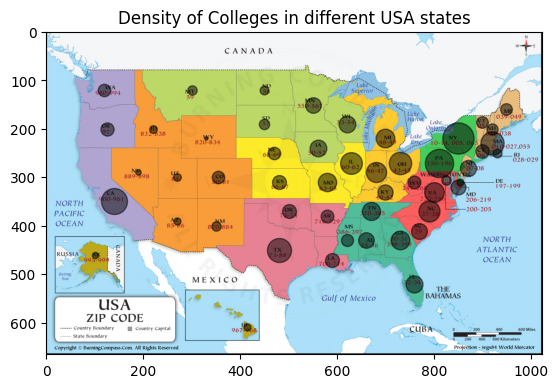

In [8]:
img = io.imread('us-zip-code-map.jpg')
plt.imshow(img)
for i in list(pc_count.keys()):
    plt.scatter(coords[i][0],coords[i][1],color = 'black',alpha=0.5,s=pc_count[i]*5)
plt.title('Density of Colleges in different USA states')
plt.show()

In [9]:
frequency = usnews['state(postal code)'].value_counts()
frequency = frequency.sort_values(ascending=False)
frequency = frequency.iloc[0:10]
postal_names = {'NY':'Ney York','PA':'Pennsylvania','CA':'California','TX':'Texas','MA':'Massachusetts','OH':'Ohio','IL':'Illinois','NC':'North Carolina','IN':'Indiana','VA':'Virginia'}
df1 = pd.DataFrame({"Names":postal_names.values(),'Frequency':frequency})
postal_codes = df1.index
display(df1)

arr_pub = []
arr_pvt = []
for i in range(len(postal_codes)):
    arr_pub.append(len(usnews[(usnews['state(postal code)']==postal_codes[i]) & (usnews['pub(1)-pvt(2)']==1)].index))
for i in range(len(postal_codes)):
    arr_pvt.append(len(usnews[(usnews['state(postal code)']==postal_codes[i]) & (usnews['pub(1)-pvt(2)']==2)].index))
print(arr_pub,arr_pvt)
display(df1)


,Names,Frequency
NY,Ney York,101
PA,Pennsylvania,83
CA,California,70
TX,Texas,60
MA,Massachusetts,56
OH,Ohio,52
IL,Illinois,49
NC,North Carolina,46
IN,Indiana,42
VA,Virginia,40


[28, 18, 28, 27, 11, 13, 10, 14, 13, 15] [73, 65, 42, 33, 45, 39, 39, 32, 29, 25]


,Names,Frequency
NY,Ney York,101
PA,Pennsylvania,83
CA,California,70
TX,Texas,60
MA,Massachusetts,56
OH,Ohio,52
IL,Illinois,49
NC,North Carolina,46
IN,Indiana,42
VA,Virginia,40


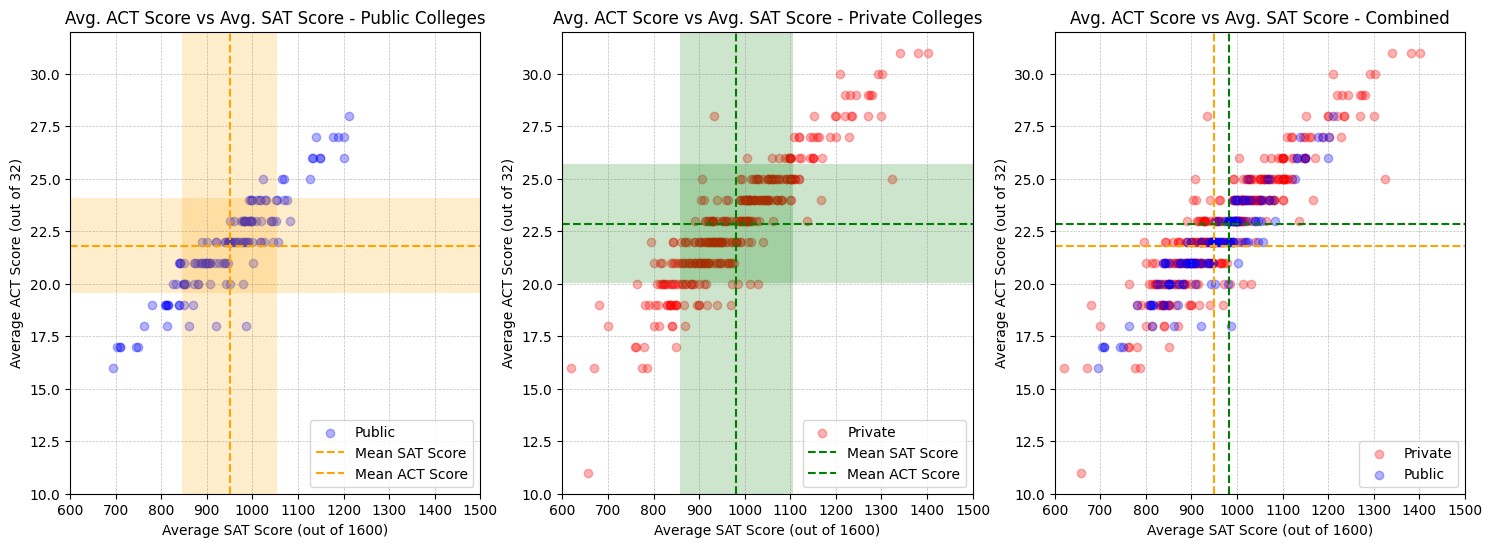

Public
               fice  pub(1)-pvt(2)  avg combined sat     avg act
count    144.000000          144.0        144.000000  144.000000
mean    3129.326389            1.0        950.090278   21.812500
std     2186.691273            0.0        103.488921    2.268571
min     1009.000000            1.0        694.000000   16.000000
25%     1612.500000            1.0        880.750000   21.000000
50%     2847.500000            1.0        952.000000   22.000000
75%     3624.250000            1.0       1000.500000   23.000000
max    11462.000000            1.0       1211.000000   28.000000
Private
               fice  pub(1)-pvt(2)  avg combined sat     avg act
count    344.000000          344.0        344.000000  344.000000
mean    3105.854651            2.0        981.784884   22.854651
std     3456.983139            0.0        124.239495    2.840119
min     1012.000000            2.0        620.000000   11.000000
25%     1821.500000            2.0        900.000000   21.000000
50%     27

In [10]:
X = pd.DataFrame({'fice':usnews['fice'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'avg combined sat':usnews['avg combined sat'],'avg act':usnews['avg act']})
X = X[(X['avg combined sat'] != '*') & (X['avg act'] != '*')]
X['avg act'] = X['avg act'].astype('int64')
X['avg combined sat'] = X['avg combined sat'].astype('int64')

X_pub = X[(X['pub(1)-pvt(2)']==1)]
X_pvt = X[(X['pub(1)-pvt(2)']==2)]

fig,ax = plt.subplots(1,3,figsize=(18,6),sharex=True)

plt.subplot(1,3,1)
plt.ylim(10,32)
plt.xlim(600,1500)
plt.scatter(X_pub['avg combined sat'],X_pub['avg act'],color = 'blue',alpha=0.3)
plt.title('Avg. ACT Score vs Avg. SAT Score - Public Colleges')
plt.xlabel('Average SAT Score (out of 1600)')
plt.ylabel('Average ACT Score (out of 32)')
plt.vlines(950.090278,10,32,color = 'orange',linestyles='dashed')
plt.hlines(21.812500,600,1500,color = 'orange',linestyles='dashed')
plt.axvspan(950.090278-103.488921,950.090278+103.488921, facecolor='orange', alpha=0.2)
plt.axhspan(21.812500-2.268571,21.812500+2.268571, facecolor='orange', alpha=0.2)
plt.legend(['Public','Mean SAT Score','Mean ACT Score'],loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.subplot(1,3,2)
plt.ylim(10,32)
plt.scatter(X_pvt['avg combined sat'],X_pvt['avg act'],color = 'red',alpha=0.3)
plt.title('Avg. ACT Score vs Avg. SAT Score - Private Colleges')
plt.xlabel('Average SAT Score (out of 1600)')
plt.ylabel('Average ACT Score (out of 32)')
plt.vlines(981.784884,10,32,color = 'green',linestyles='dashed')
plt.hlines(22.854651,600,1500,color = 'green',linestyles='dashed')
plt.axvspan(981.784884-124.239495,981.784884+124.239495, facecolor='green', alpha=0.2)
plt.axhspan(22.854651-2.840119,22.854651+2.840119, facecolor='green', alpha=0.2)
plt.legend(['Private','Mean SAT Score','Mean ACT Score'],loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)


plt.subplot(1,3,3)
plt.ylim(10,32)
plt.scatter(X_pvt['avg combined sat'],X_pvt['avg act'],color = 'red',alpha=0.3)
plt.scatter(X_pub['avg combined sat'],X_pub['avg act'],color = 'blue',alpha=0.3)
plt.title('Avg. ACT Score vs Avg. SAT Score - Combined')
plt.xlabel('Average SAT Score (out of 1600)')
plt.ylabel('Average ACT Score (out of 32)')
plt.vlines(950.090278,10,32,color = 'orange',linestyles='dashed')
plt.hlines(21.812500,600,1500,color = 'orange',linestyles='dashed')
plt.vlines(981.784884,10,32,color = 'green',linestyles='dashed')
plt.hlines(22.854651,600,1500,color = 'green',linestyles='dashed')
plt.legend(['Private','Public'],loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

print('Public')
print(X_pub.describe())
print('Private')
print(X_pvt.describe())


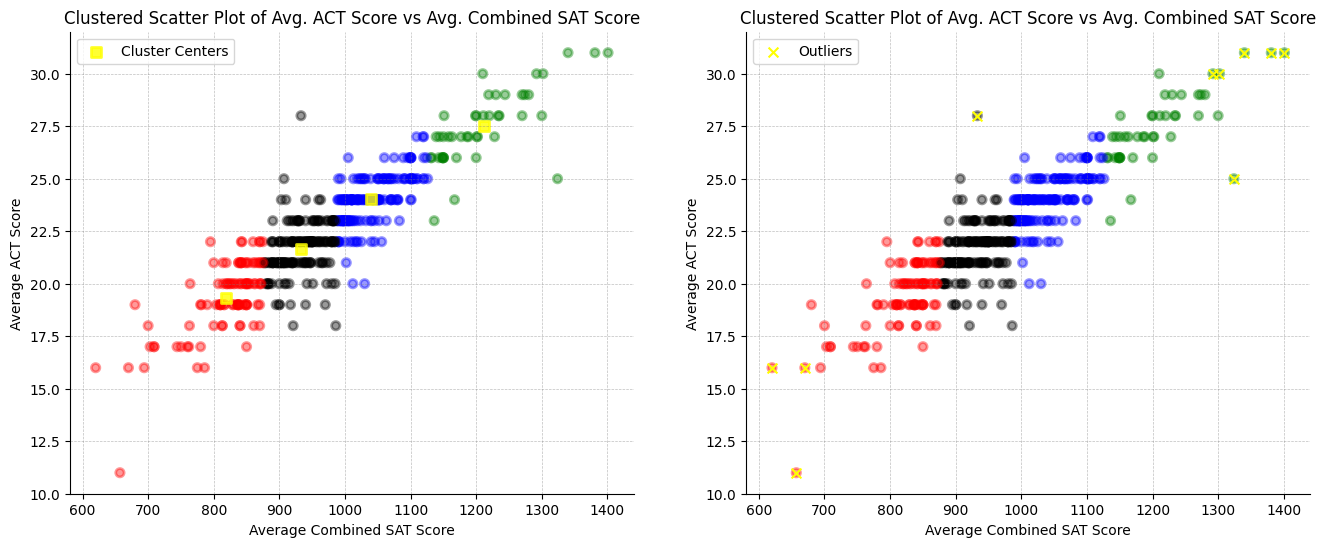

,college name,state(postal code),avg combined sat,avg act,Cluster,Z_ACS,Z_AA
79,Pomona College,CA,1340,31,3,3.084948,3.106598
97,Stanford University,CA,1401,31,3,3.596913,3.106598
455,Massachusetts Institute of Technology,MA,1381,31,3,3.429055,3.106598
495,Johns Hopkins University,MD,1292,30,3,2.682090,2.739078
654,Duke University,NC,1302,30,3,2.766019,2.739078
1069,Voorhees College,SC,670,16,0,-2.538276,-2.406202
1154,Jarvis Christian College,TX,657,11,0,-2.647383,-4.243802
1155,Texas College,TX,620,16,0,-2.957920,-2.406202


,college name,state(postal code),avg combined sat,avg act,Cluster,Z_ACS,Z_AA
432,Amherst College,MA,1324,25,3,2.950662,0.901478


,college name,state(postal code),avg combined sat,avg act,Cluster,Z_ACS,Z_AA
846,Utica College of Syracuse University,NY,933,28,2,-0.330951,2.004038


In [11]:
X = pd.DataFrame({'college name':usnews['college name'],'state(postal code)':usnews['state(postal code)'],'avg combined sat':usnews['avg combined sat'],'avg act':usnews['avg act']})
X = X[(X['avg combined sat'] != '*') & (X['avg act'] != '*')]
X['avg act'] = X['avg act'].astype('int64')
X['avg combined sat'] = X['avg combined sat'].astype('int64')

kmeans = KMeans(n_clusters=4,n_init='auto')
kmeans.fit(X.iloc[0:,2:])
labels = kmeans.predict(X.iloc[0:,2:])
X['Cluster'] = labels
colors = ['red', 'blue','black','green']
cluster_centers = kmeans.cluster_centers_

acs = X.iloc[:,2]
aa = X.iloc[:,3]
X['Z_ACS'] = stats.zscore(acs)
X['Z_AA'] = stats.zscore(aa)
threshold = 2.4

outliers = X[((X['Z_ACS']>threshold) | (X['Z_ACS']<-threshold)) & ((X['Z_AA']>threshold) | (X['Z_AA']<-threshold))]
p = X[(X['avg combined sat']>1300) & (X['avg act']<25.5)]
q = X[(X['avg combined sat']<1000) & (X['avg act']>27.5)]

fig, ax = plt.subplots(1,2,figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(acs,aa, c=[colors[label] for label in labels],alpha=0.4,linewidths=2)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='yellow',marker='s',alpha=0.8,linewidths=2,s=50,label='Cluster Centers')
plt.xlabel('Average Combined SAT Score')
plt.ylabel('Average ACT Score')
plt.title('Clustered Scatter Plot of Avg. ACT Score vs Avg. Combined SAT Score')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(acs,aa, c=[colors[label] for label in labels],alpha=0.4,linewidths=2)
plt.scatter(outliers.iloc[:,2],outliers.iloc[:,3],marker="x",color='yellow',s=50,label='Outliers')
plt.scatter(1324,25,marker="x",color='yellow',s=50)
plt.scatter(933,28,marker="x",color='yellow',s=50)
plt.xlabel('Average Combined SAT Score')
plt.ylabel('Average ACT Score')
plt.title('Clustered Scatter Plot of Avg. ACT Score vs Avg. Combined SAT Score')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

display(outliers)
display(p,q)

y_pub = 0.7500401804277376 x + 69.5049012678806
y_pvt = 0.7911885036517317 x + 65.579084930855


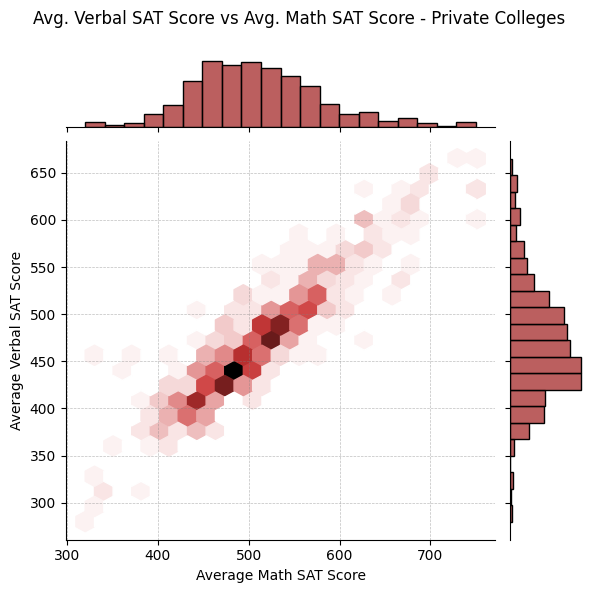

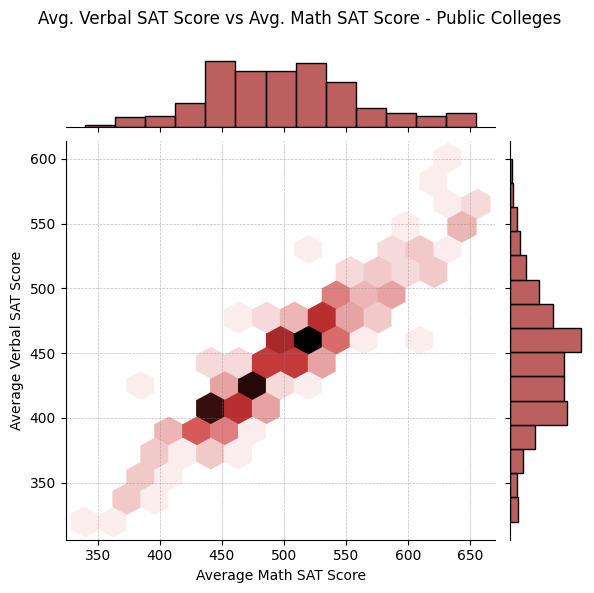

In [12]:
Y = pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'avg math sat':usnews['avg math sat'],'avg verbal sat':usnews['avg verbal sat']})
Y = Y[(Y['avg math sat'] != '*') & (Y['avg verbal sat'] != '*')]
Y['avg math sat'] = Y['avg math sat'].astype('int64')
Y['avg verbal sat'] = Y['avg verbal sat'].astype('int64')

Y_pub = Y[(Y['pub(1)-pvt(2)']==1)]
Y_pvt = Y[(Y['pub(1)-pvt(2)']==2)]
m_pub,c_pub,a,b,c = stats.linregress(Y_pub['avg math sat'],Y_pub['avg verbal sat'])
m_pvt,c_pvt,a,b,c = stats.linregress(Y_pvt['avg math sat'],Y_pvt['avg verbal sat'])

print(f'y_pub = {m_pub} x + {c_pub}')
print(f'y_pvt = {m_pvt} x + {c_pvt}')

x = np.linspace(1,800,800,endpoint=True)

sns.jointplot(x=Y_pvt['avg math sat'],y=Y_pvt['avg verbal sat'],data = Y_pvt.iloc[:,1:],kind='hex',color='brown')
plt.xlabel('Average Math SAT Score')
plt.ylabel('Average Verbal SAT Score')
plt.suptitle('Avg. Verbal SAT Score vs Avg. Math SAT Score - Private Colleges')
plt.subplots_adjust(top=0.9)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

sns.jointplot(x=Y_pub['avg math sat'],y=Y_pub['avg verbal sat'],data = Y_pub.iloc[:,1:],kind='hex',color='brown')
plt.xlabel('Average Math SAT Score')
plt.ylabel('Average Verbal SAT Score')
plt.suptitle('Avg. Verbal SAT Score vs Avg. Math SAT Score - Public Colleges')
plt.subplots_adjust(top=0.9)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()


,college name,pub(1)-pvt(2),#applications received,#applicants accepted,#new students enrolled,%new students (top 10% hs class),%new students (top 25% hs class)
750,Rutgers at New Brunswick,1,48094,26330,4520,36,79


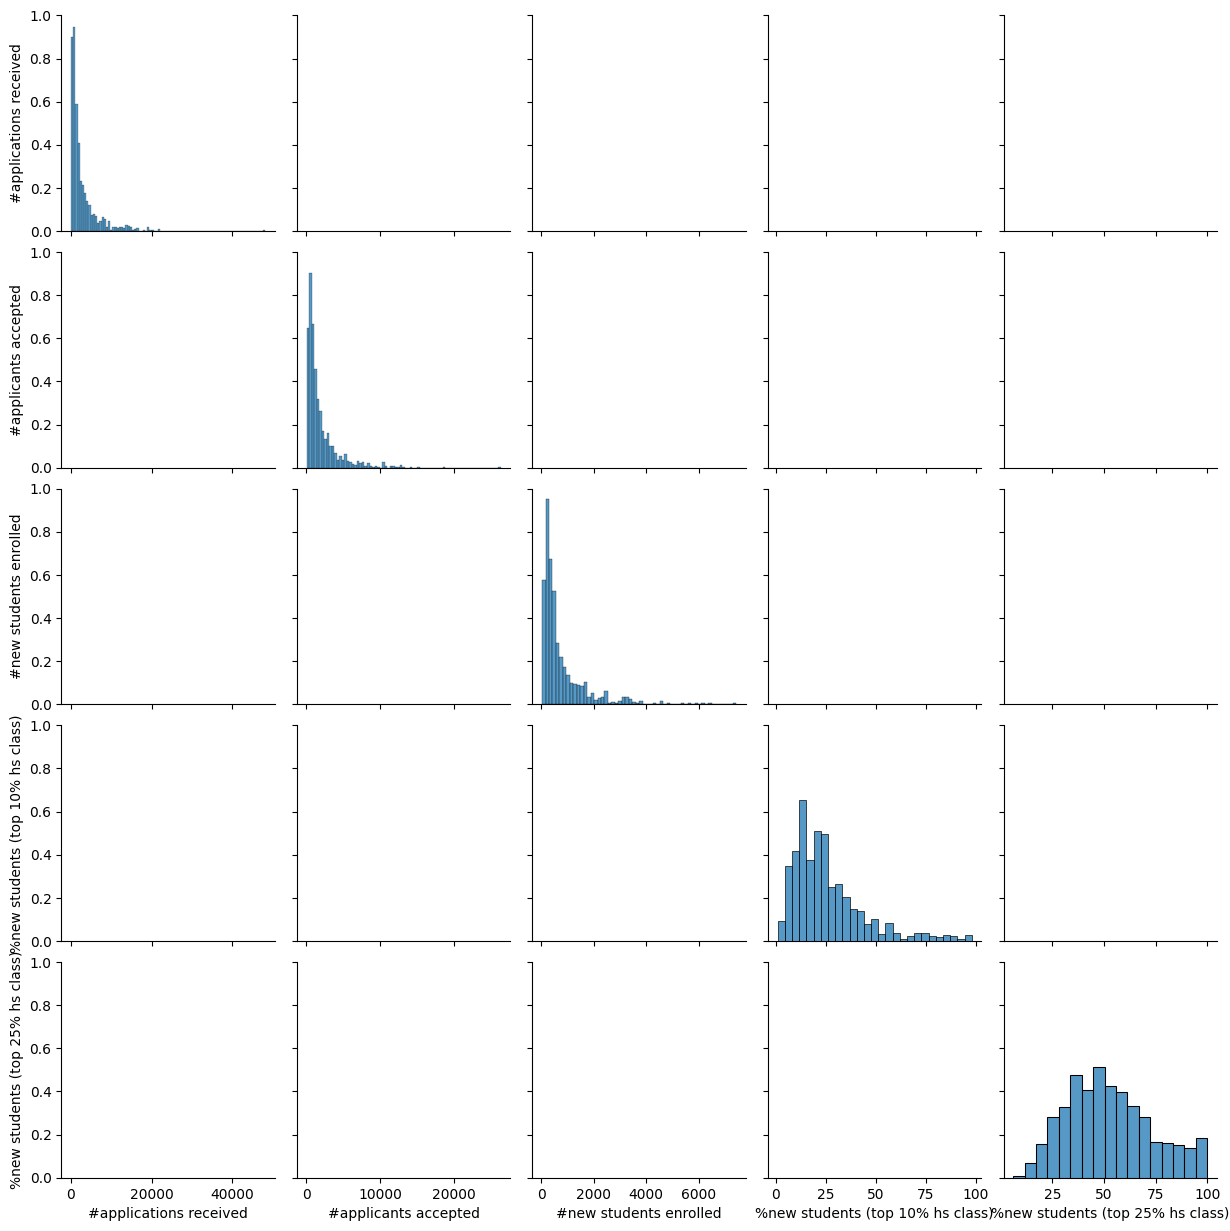

In [13]:
Z = pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'#applications received':usnews['#applications received'],'#applicants accepted':usnews['#applicants accepted'],'#new students enrolled':usnews['#new students enrolled'],'%new students (top 10% hs class)':usnews['%new students (top 10% hs class)'],'%new students (top 25% hs class)':usnews['%new students (top 25% hs class)']})
Z = Z[(Z['#applications received'] != '*') & (Z['#applicants accepted'] != '*') & (Z['#new students enrolled'] != '*') & (Z['%new students (top 10% hs class)'] != '*') & (Z['%new students (top 25% hs class)'] != '*')]
Z['#applications received'] = Z['#applications received'].astype('int64')
Z['#applicants accepted'] = Z['#applicants accepted'].astype('int64')
Z['#new students enrolled'] = Z['#new students enrolled'].astype('int64')
Z['%new students (top 10% hs class)'] = Z['%new students (top 10% hs class)'].astype('int64')
Z['%new students (top 25% hs class)'] = Z['%new students (top 25% hs class)'].astype('int64')


A = Z.groupby('pub(1)-pvt(2)')[['#applications received','#applicants accepted','#new students enrolled']].sum()
sns.pairplot(Z.iloc[:,2:],kind='hex')
Q = Z[(Z['#applications received']>40000)]
display(Q)

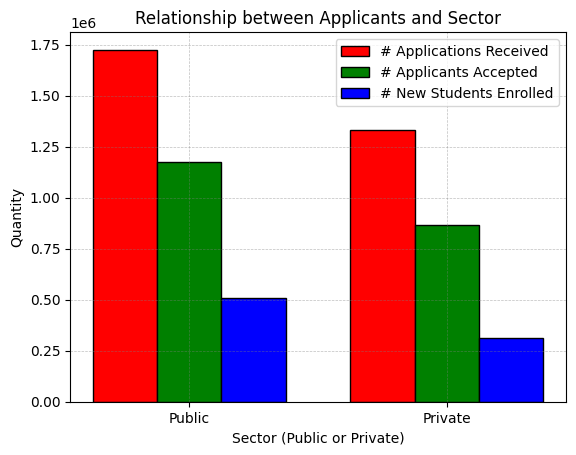

In [14]:
a = A.iloc[:,0]
b = A.iloc[:,1]
c = A.iloc[:,2]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, a, color = 'r',
        width = width, edgecolor = 'black',
        label='# Applications Received')
plt.bar(r + width, b, color = 'g',
        width = width, edgecolor = 'black',
        label='# Applicants Accepted')
plt.bar(r + 2*width, c, color = 'b',
        width = width, edgecolor = 'black',
        label='# New Students Enrolled')
  
plt.xlabel("Sector (Public or Private)")
plt.ylabel("Quantity")
plt.title("Relationship between Applicants and Sector")
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(r + width,['Public','Private'])
plt.legend()
  
plt.show()

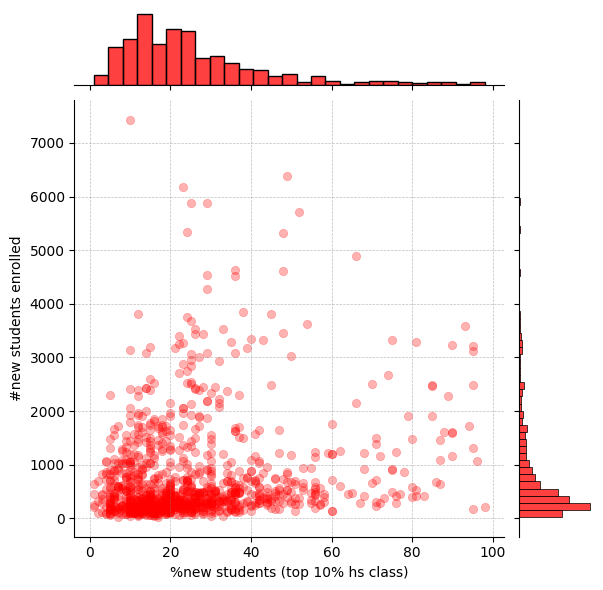

,college name,pub(1)-pvt(2),#applications received,#applicants accepted,#new students enrolled,%new students (top 10% hs class),%new students (top 25% hs class)
98,University of California at Berkeley,1,19873,8252,3215,95,100
99,University of California at Davis,1,16343,11399,3124,95,100
100,University of California at Irvine,1,15698,10775,2478,85,100
101,University of California at Los Angeles,1,22165,10435,3591,93,100
103,University of California at San Diego,1,19433,11469,2481,95,100
104,University of California at Santa Barbara,1,16663,14141,3239,90,100
211,Georgia Institute of Technology,1,7837,4527,2276,89,99
439,Boston College,2,13112,6179,2154,66,94
559,University of Michigan at Ann Arbor,1,19152,12940,4893,66,92
681,University of North Carolina at Chapel Hill,1,14596,5985,3331,75,92


,pub(1)-pvt(2),#applications received,#applicants accepted,#new students enrolled,%new students (top 10% hs class),%new students (top 25% hs class)
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,1.682420,2889.958412,1928.309074,772.767486,25.758979,52.793951
std,0.465755,3788.433090,2392.931989,922.410375,18.343344,20.856882
min,1.000000,57.000000,44.000000,27.000000,1.000000,6.000000
25%,1.000000,696.750000,553.000000,229.500000,13.000000,37.000000
50%,2.000000,1464.500000,1087.000000,428.000000,21.000000,51.000000
75%,2.000000,3459.750000,2299.250000,910.750000,32.000000,66.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000


In [15]:
sns.jointplot(x = Z['%new students (top 10% hs class)'],y = Z['#new students enrolled'],kind='scatter',alpha=0.3,edgecolor='red',color='red')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()
out = Z[(Z['#new students enrolled'] > 910 + (910 - 229)*1.5) & (Z['%new students (top 10% hs class)'] > 32 + (32-13)*1.5)]
display(out)
Z.describe()

In [16]:
B = pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'in-state tuition':usnews['in-state tuition'],'out-of-state tuition':usnews['out-of-state tuition'],'room-board costs':usnews['room-board costs'],'additional fees':usnews['additional fees'],'est. book costs':usnews['est. book costs'],'est. personal spending':usnews['est. personal spending'],'instructional expd. per student':usnews['instructional expd. per student']})
B = B[(B['in-state tuition'] != '*') & (B['out-of-state tuition'] != '*') & (B['room-board costs'] != '*') & (B['additional fees'] != '*') & (B['est. book costs'] != '*') & (B['est. personal spending'] != '*') & (B['instructional expd. per student'] != '*')]
B['in-state tuition'] = B['in-state tuition'].astype('int64')
B['out-of-state tuition'] = B['out-of-state tuition'].astype('int64')
B['room-board costs'] = B['room-board costs'].astype('int64')
B['additional fees'] = B['additional fees'].astype('int64')
B['est. book costs'] = B['est. book costs'].astype('int64')
B['est. personal spending'] = B['est. personal spending'].astype('int64')
B['instructional expd. per student'] = B['instructional expd. per student'].astype('int64')
B = B.assign(total = B['in-state tuition'] + B['out-of-state tuition'] + B['room-board costs'] + B['additional fees'] + B['est. book costs'] + B['est. personal spending'])
C = B.groupby(by='pub(1)-pvt(2)')[['in-state tuition','out-of-state tuition','room-board costs','additional fees','est. book costs','est. personal spending','total','instructional expd. per student']].sum()
C = C.assign(avg_costs = C['total']/847)
C = C.assign(avg_institute_spending = C['instructional expd. per student']/847)
display(C)
B.describe()


,in-state tuition,out-of-state tuition,room-board costs,additional fees,est. book costs,est. personal spending,total,instructional expd. per student,avg_costs,avg_institute_spending
pub(1)-pvt(2),,,,,,,,,,
1,575178,1610045,932138,128128,140655,409261,3795405,1817939,4480.997639,2146.327037
2,6796529,6807395,2713674,180025,325515,735619,17558757,6115468,20730.527745,7220.151122


,pub(1)-pvt(2),in-state tuition,out-of-state tuition,room-board costs,additional fees,est. book costs,est. personal spending,instructional expd. per student,total
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,1.698937,8703.314050,9937.945691,4304.382527,363.817001,550.377804,1351.688312,9366.478158,25211.525384
std,0.458991,5415.504116,4242.416761,1175.194415,335.187800,171.608215,700.092630,5137.699233,10138.679948
min,1.000000,480.000000,1044.000000,1306.000000,9.000000,90.000000,250.000000,2033.000000,5106.000000
25%,1.000000,2967.000000,6600.000000,3477.000000,135.000000,470.000000,860.000000,6439.000000,16282.500000
50%,2.000000,9000.000000,9400.000000,4180.000000,270.000000,500.000000,1200.000000,8116.000000,24486.000000
75%,2.000000,12462.000000,12500.000000,5025.000000,470.000000,600.000000,1700.000000,10537.000000,32028.500000
max,2.000000,20655.000000,20655.000000,8124.000000,3247.000000,2340.000000,6800.000000,62469.000000,49100.000000


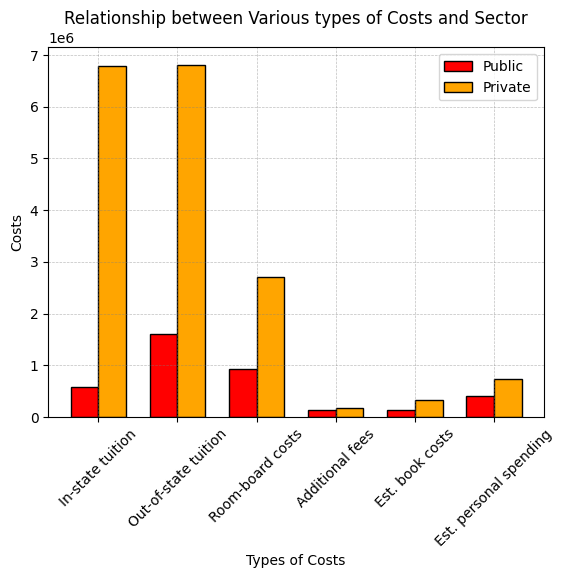

In [17]:
a = C.iloc[0,:6]
b = C.iloc[1,:6]

n=6
r = np.arange(n)
width = 0.35
  
  
plt.bar(r, a, color = 'r',width = width, edgecolor = 'black',label='Public')
plt.bar(r + width, b, color = 'orange',width = width, edgecolor = 'black',label='Private')
  
plt.xlabel("Types of Costs")
plt.ylabel("Costs")
plt.title("Relationship between Various types of Costs and Sector")
plt.xticks(r+(width)/2,['In-state tuition','Out-of-state tuition','Room-board costs','Additional fees','Est. book costs','Est. personal spending'],rotation=45)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

plt.show()

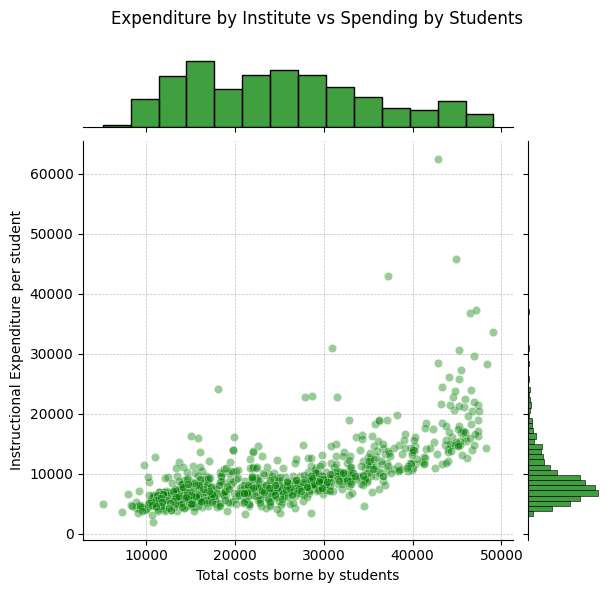

,college name,pub(1)-pvt(2),in-state tuition,out-of-state tuition,room-board costs,additional fees,est. book costs,est. personal spending,instructional expd. per student,total
440,Boston University,2,18420,18420,6810,270,475,1025,16836,45420
427,Tulane University,2,19040,19040,5950,510,350,800,16920,45690
109,University of Southern California,2,17230,17230,6482,330,600,2210,17007,44082
981,Haverford College,2,18833,18833,6235,182,685,1100,17021,45868
851,Vassar College,2,18920,18920,5950,465,600,800,17089,45655
442,Brandeis University,2,19380,19380,6750,450,410,1000,17150,47370
961,Bryn Mawr College,2,18165,18165,6750,375,500,1200,17449,45155
189,University of Miami,2,16500,16500,6526,180,630,1985,17500,42321
653,Davidson College,2,17295,17295,5070,169,600,1011,17581,41440
562,Carleton College,2,19292,19292,3957,126,550,550,17960,43767


In [18]:
sns.jointplot(y=B['instructional expd. per student'],x=B['total'],alpha=0.4,color='g')
plt.xlabel('Total costs borne by students')
plt.ylabel('Instructional Expenditure per student')
plt.suptitle('Expenditure by Institute vs Spending by Students')
plt.subplots_adjust(top=0.9)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
out = B[(B['instructional expd. per student'] > 10537 + (10537-6439)*1.5)].sort_values(by='instructional expd. per student')
plt.show()
display(out)

In [19]:
C= pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'%faculty with phd':usnews['%faculty with phd'],'student/faculty':usnews['student/faculty'],'%alumni who donate':usnews['%alumni who donate'],'instructional expd. per student':usnews['instructional expd. per student'],'graduation rate':usnews['graduation rate']})
C = C[(C['%faculty with phd'] != '*') & (C['student/faculty'] != '*') & (C['%alumni who donate'] != '*') & (C['instructional expd. per student'] != '*') & (C['graduation rate'] != '*')]
C['%faculty with phd'] = C['%faculty with phd'].astype('int64')
C['student/faculty'] = C['student/faculty'].astype('float')
C['%alumni who donate'] = C['%alumni who donate'].astype('int64')
C['instructional expd. per student'] = C['instructional expd. per student'].astype('int64')
C['graduation rate'] = C['graduation rate'].astype('int64')
display(C)
C.describe()

,college name,pub(1)-pvt(2),%faculty with phd,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
0,Alaska Pacific University,2,76,11.9,2,10922,15
6,University of Montevallo,1,72,18.9,8,5883,51
8,Auburn University-Main Campus,1,85,16.7,18,6642,69
9,Birmingham-Southern College,2,74,14.0,34,8649,72
10,University of North Alabama,1,62,19.4,5,4944,76
...,...,...,...,...,...,...,...
1293,Salem-Teikyo University,2,46,13.0,9,8946,98
1295,West Liberty State College,1,33,16.3,10,4249,60
1299,West Virginia Wesleyan College,2,58,16.4,42,8080,67
1300,Wheeling Jesuit College,2,66,14.1,27,7494,72


,pub(1)-pvt(2),%faculty with phd,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,1.670319,71.435259,14.421912,21.254980,9375.864542,62.744024
std,0.470332,16.614712,4.116457,12.718312,5371.077559,18.468836
min,1.000000,8.000000,2.500000,0.000000,3186.000000,8.000000
25%,1.000000,61.000000,11.600000,11.000000,6417.250000,50.000000
50%,2.000000,74.000000,13.900000,19.000000,8052.500000,63.000000
75%,2.000000,84.000000,17.100000,30.000000,10504.250000,76.000000
max,2.000000,103.000000,39.800000,81.000000,62469.000000,118.000000


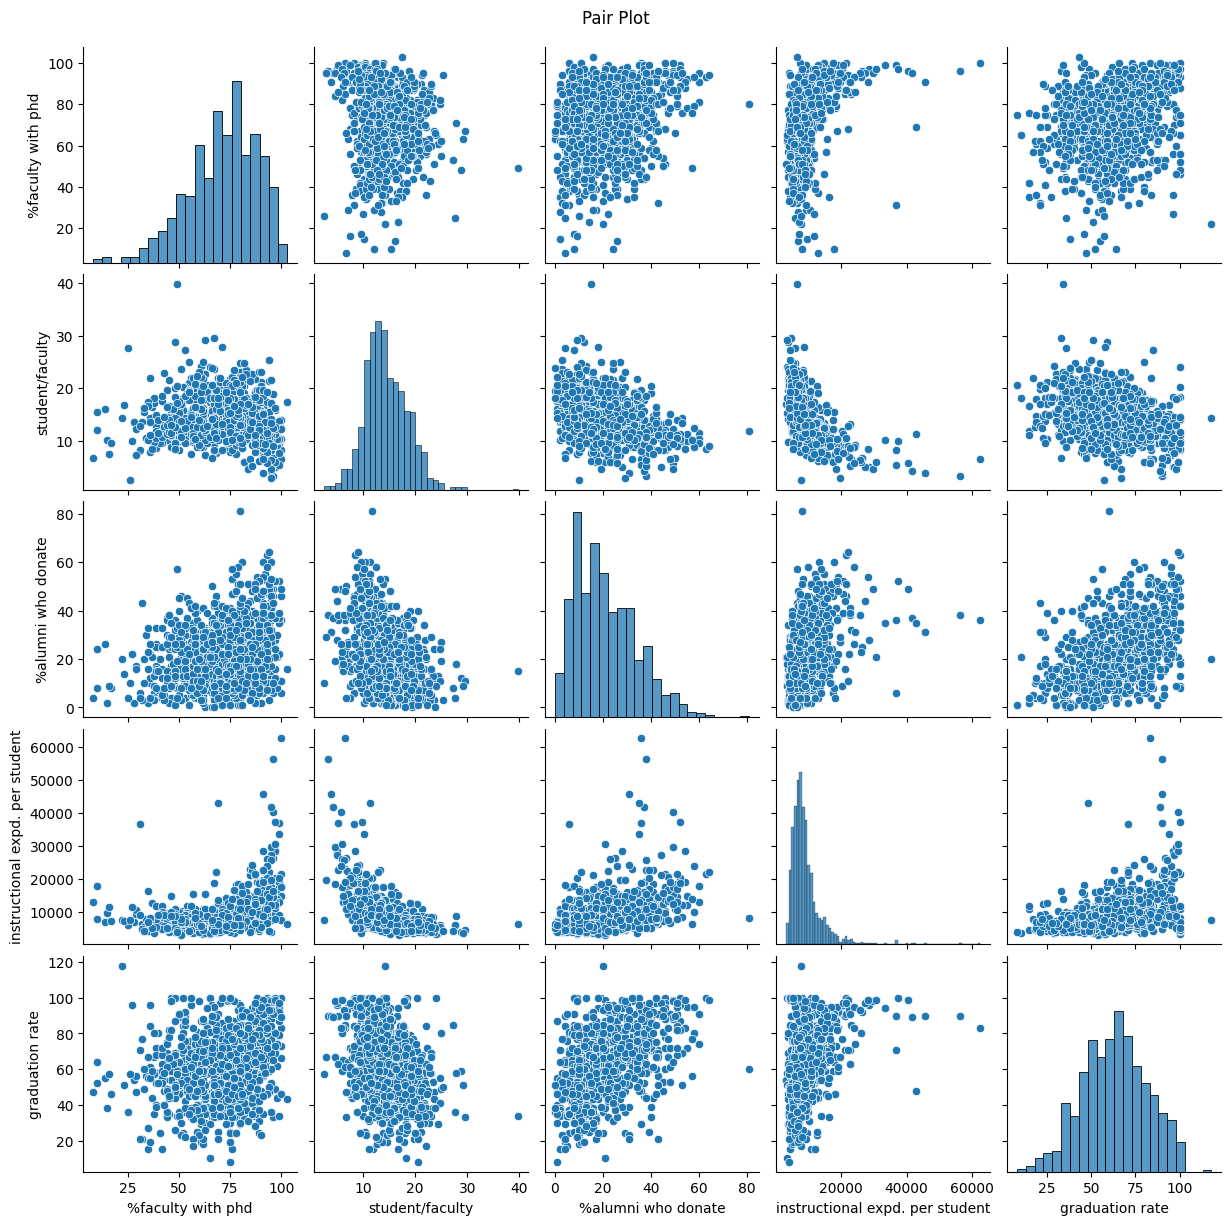

In [20]:
sns.pairplot(C.iloc[:,2:])
plt.suptitle('Pair Plot')
plt.subplots_adjust(top=0.95)
plt.show()

,#full professors,#associate professors,#assistant professors,ts_f_p,ts_asso_p,ts_assi_p,a_f_p,a_asso_p,a_assi_p
type (I or IIA or IIB),,,,,,,,,
I,60175,40886,33986,41296637,19862889,13979824,686.275646,330.085401,232.319468
IIA,34274,28083,28441,19198046,12613559,10585100,560.134388,368.021211,308.837603
IIB,15504,14367,16129,7817281,5801451,5449072,504.210591,374.190596,351.462332
VIIB,27,31,33,11205,10788,10296,415.000000,399.555556,381.333333


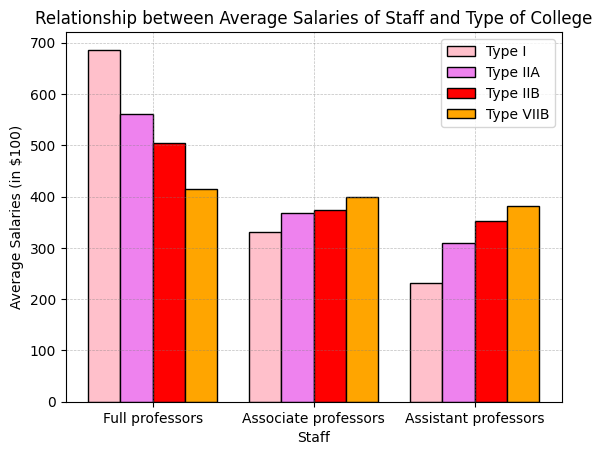

In [74]:
D= aaup.copy()
D = D[(D['avg slry - full professors'] != '*') & (D['avg slry - associate professors'] != '*') & (D['avg slry - assistant professors'] != '*') & (D['avg slry - all ranks'] != '*') & (D['avg compensation - full professors'] != '*') & (D['avg compensation - associate professors'] != '*') & (D['avg compensation - assistant professors'] != '*') & (D['avg compensation - all ranks'] != '*') & (D['#full professors'] != '*') & (D['#associate professors'] != '*') & (D['#assistant professors'] != '*')]
D['avg slry - full professors'] = D['avg slry - full professors'].astype('int64')
D['avg slry - associate professors'] = D['avg slry - associate professors'].astype('int64')
D['avg slry - assistant professors'] = D['avg slry - assistant professors'].astype('int64')
D['avg slry - all ranks'] = D['avg slry - all ranks'].astype('int64')

D['avg compensation - full professors'] = D['avg compensation - full professors'].astype('int64')
D['avg compensation - associate professors'] = D['avg compensation - associate professors'].astype('int64')
D['avg compensation - assistant professors'] = D['avg compensation - assistant professors'].astype('int64')
D['avg compensation - all ranks'] = D['avg compensation - all ranks'].astype('int64')

D['#full professors'] = D['#full professors'].astype('int64')
D['#associate professors'] = D['#associate professors'].astype('int64')
D['#assistant professors'] = D['#assistant professors'].astype('int64')

D = D.assign(ts_f_p = D['#full professors']*D['avg slry - full professors'])
D = D.assign(ts_asso_p = D['#associate professors']*D['avg slry - associate professors'])
D = D.assign(ts_assi_p = D['#assistant professors']*D['avg slry - assistant professors'])


E = D.groupby(by='type (I or IIA or IIB)')[['#full professors','#associate professors','#assistant professors','ts_f_p','ts_asso_p','ts_assi_p']].sum()

E = E.assign(a_f_p = E['ts_f_p']/E['#full professors'])
E = E.assign(a_asso_p = E['ts_asso_p']/E['#full professors'])
E = E.assign(a_assi_p = E['ts_assi_p']/E['#full professors'])
display(E)

a = E.iloc[0,6:]
b = E.iloc[1,6:]
c = E.iloc[2,6:]
d = E.iloc[3,6:]

n=3
r = np.arange(n)
width = 0.2
  
  
plt.bar(r, a, color = 'pink',width = width, edgecolor = 'black',label='Type I')
plt.bar(r + width, b, color = 'violet',width = width, edgecolor = 'black',label='Type IIA')
plt.bar(r + 2*width, c, color = 'red',width = width, edgecolor = 'black',label='Type IIB ')
plt.bar(r + 3*width, d, color = 'orange',width = width, edgecolor = 'black',label='Type VIIB')
  
plt.xlabel("Staff")
plt.ylabel("Average Salaries (in $100)")
plt.title("Relationship between Average Salaries of Staff and Type of College")
plt.xticks(r+3*width/2,['Full professors','Associate professors','Assistant professors'])
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

,#full professors,#associate professors,#assistant professors,tc_f_p,tc_asso_p,tc_assi_p,a_f_p,a_asso_p,a_assi_p
type (I or IIA or IIB),,,,,,,,,
I,60175,40886,33986,51074751,25007466,17615024,848.770270,415.578995,292.729938
IIA,34274,28083,28441,24019109,15953005,13409729,700.796785,465.455010,391.250773
IIB,15504,14367,16129,9846759,7329183,6844191,635.110875,472.728522,441.446788
VIIB,27,31,33,13716,13051,12639,508.000000,483.370370,468.111111


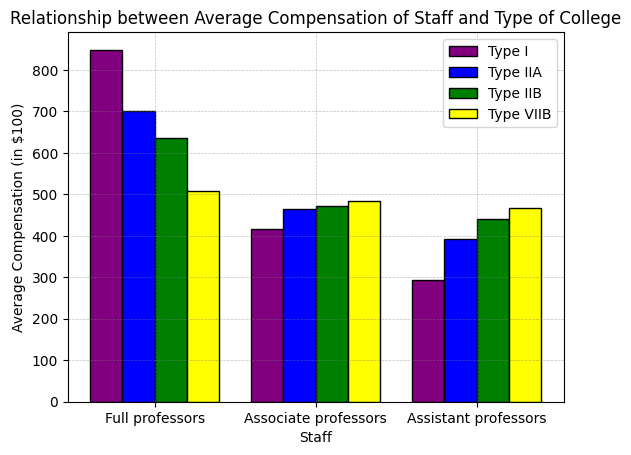

In [51]:
D= aaup.copy()
D = D[(D['avg slry - full professors'] != '*') & (D['avg slry - associate professors'] != '*') & (D['avg slry - assistant professors'] != '*') & (D['avg slry - all ranks'] != '*') & (D['avg compensation - full professors'] != '*') & (D['avg compensation - associate professors'] != '*') & (D['avg compensation - assistant professors'] != '*') & (D['avg compensation - all ranks'] != '*') & (D['#full professors'] != '*') & (D['#associate professors'] != '*') & (D['#assistant professors'] != '*')]
D['avg slry - full professors'] = D['avg slry - full professors'].astype('int64')
D['avg slry - associate professors'] = D['avg slry - associate professors'].astype('int64')
D['avg slry - assistant professors'] = D['avg slry - assistant professors'].astype('int64')
D['avg slry - all ranks'] = D['avg slry - all ranks'].astype('int64')

D['avg compensation - full professors'] = D['avg compensation - full professors'].astype('int64')
D['avg compensation - associate professors'] = D['avg compensation - associate professors'].astype('int64')
D['avg compensation - assistant professors'] = D['avg compensation - assistant professors'].astype('int64')
D['avg compensation - all ranks'] = D['avg compensation - all ranks'].astype('int64')

D['#full professors'] = D['#full professors'].astype('int64')
D['#associate professors'] = D['#associate professors'].astype('int64')
D['#assistant professors'] = D['#assistant professors'].astype('int64')

D = D.assign(tc_f_p = D['#full professors']*D['avg compensation - full professors'])
D = D.assign(tc_asso_p = D['#associate professors']*D['avg compensation - associate professors'])
D = D.assign(tc_assi_p = D['#assistant professors']*D['avg compensation - assistant professors'])

E = D.groupby(by='type (I or IIA or IIB)')[['#full professors','#associate professors','#assistant professors','tc_f_p','tc_asso_p','tc_assi_p']].sum()

E = E.assign(a_f_p = E['tc_f_p']/E['#full professors'])
E = E.assign(a_asso_p = E['tc_asso_p']/E['#full professors'])
E = E.assign(a_assi_p = E['tc_assi_p']/E['#full professors'])
display(E)

a = E.iloc[0,6:]
b = E.iloc[1,6:]
c = E.iloc[2,6:]
d = E.iloc[3,6:]

n=3
r = np.arange(n)
width = 0.2
  
plt.bar(r, a, color = 'purple',width = width, edgecolor = 'black',label='Type I')
plt.bar(r + width, b, color = 'blue',width = width, edgecolor = 'black',label='Type IIA')
plt.bar(r + 2*width, c, color = 'green',width = width, edgecolor = 'black',label='Type IIB ')
plt.bar(r + 3*width, d, color = 'yellow',width = width, edgecolor = 'black',label='Type VIIB')
  
plt.xlabel("Staff")
plt.ylabel("Average Compensation (in $100)")
plt.title("Relationship between Average Compensation of Staff and Type of College")
plt.xticks(r+3*width/2,['Full professors','Associate professors','Assistant professors'])
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

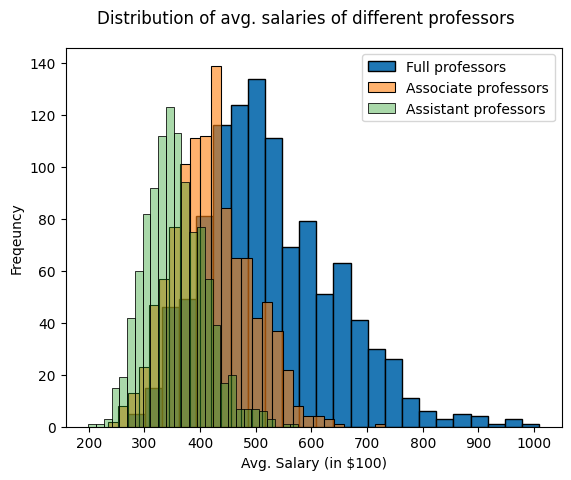

In [69]:
sns.histplot(D['avg slry - full professors'],label='Full professors',alpha=1)
sns.histplot(D['avg slry - associate professors'],label = 'Associate professors',alpha=0.6)
sns.histplot(D['avg slry - assistant professors'],label = 'Assistant professors',alpha=0.4)
plt.suptitle('Distribution of avg. salaries of different professors')
plt.subplots_adjust(top=0.9)
plt.xlabel('Avg. Salary (in $100)')
plt.ylabel('Freqeuncy')
plt.legend()

plt.show()

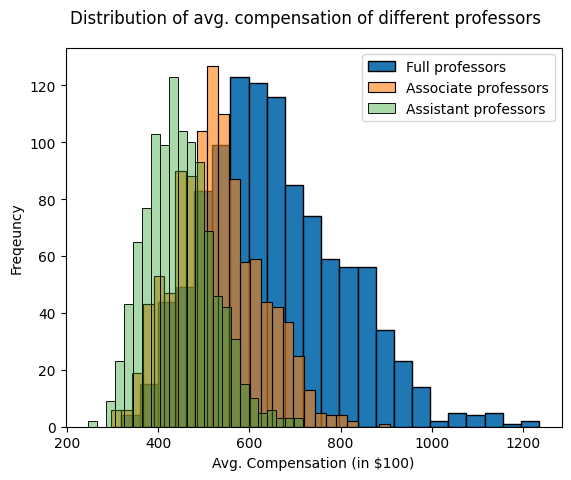

In [70]:
sns.histplot(D['avg compensation - full professors'],label='Full professors',alpha=1)
sns.histplot(D['avg compensation - associate professors'],label = 'Associate professors',alpha=0.6)
sns.histplot(D['avg compensation - assistant professors'],label = 'Assistant professors',alpha=0.4)
plt.suptitle('Distribution of avg. compensation of different professors')
plt.subplots_adjust(top=0.9)
plt.xlabel('Avg. Compensation (in $100)')
plt.ylabel('Freqeuncy')
plt.legend()

plt.show()

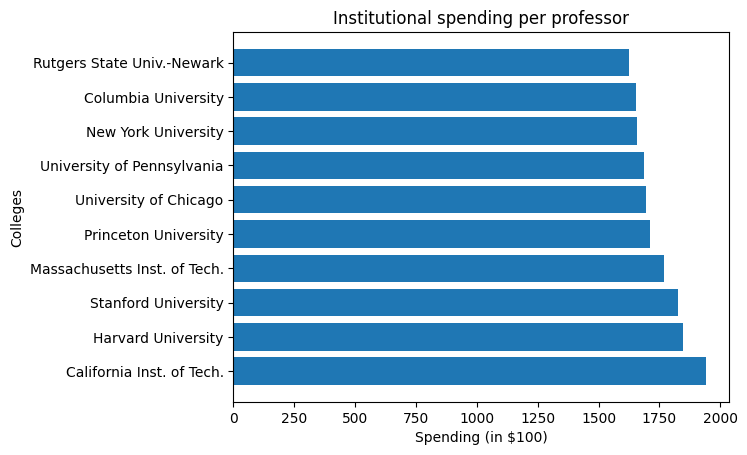

,fice,college name,state (postal code),type (I or IIA or IIB),avg slry - full professors,avg slry - associate professors,avg slry - assistant professors,avg slry - all ranks,avg compensation - full professors,avg compensation - associate professors,avg compensation - assistant professors,avg compensation - all ranks,#full professors,#associate professors,#assistant professors,#instructors,#faculty - all ranks,tse,ase
47,1131,California Inst. of Tech.,CA,I,970,733,576,866,1204,909,717,1075,173,40,44,0,257,498674,1940.365759
385,2155,Harvard University,MA,I,1009,559,500,793,1236,723,653,989,654,149,255,8,1172,1953263,1846.184310
77,1305,Stanford University,CA,I,952,658,519,824,1144,814,653,1000,533,139,145,0,834,1491716,1825.845777
388,2178,Massachusetts Inst. of Tech.,MA,I,903,637,528,757,1124,806,678,951,583,177,164,36,989,1634936,1769.411255
649,2627,Princeton University,NJ,I,963,564,437,749,1154,686,534,901,402,66,179,16,702,1107343,1711.503864
262,1774,University of Chicago,IL,I,894,586,515,742,1104,724,636,916,467,138,161,36,802,1299157,1696.027415
904,3378,University of Pennsylvania,PA,I,881,622,532,744,1086,831,712,945,541,240,212,0,993,1676595,1688.413897
708,2785,New York University,NY,I,887,591,507,683,1172,785,674,905,532,337,252,42,1231,1856712,1656.299732
679,2707,Columbia University,NY,I,882,554,452,687,1136,767,646,915,477,185,199,11,923,1425473,1655.601626
651,2631,Rutgers State Univ.-Newark,NJ,IIA,893,640,526,693,1097,812,682,871,141,125,73,16,374,550274,1623.227139


In [99]:
D= aaup.copy()
D = D[(D['avg slry - full professors'] != '*') & (D['avg slry - associate professors'] != '*') & (D['avg slry - assistant professors'] != '*') & (D['avg slry - all ranks'] != '*') & (D['avg compensation - full professors'] != '*') & (D['avg compensation - associate professors'] != '*') & (D['avg compensation - assistant professors'] != '*') & (D['avg compensation - all ranks'] != '*') & (D['#full professors'] != '*') & (D['#associate professors'] != '*') & (D['#assistant professors'] != '*')]
D['avg slry - full professors'] = D['avg slry - full professors'].astype('int64')
D['avg slry - associate professors'] = D['avg slry - associate professors'].astype('int64')
D['avg slry - assistant professors'] = D['avg slry - assistant professors'].astype('int64')

D['avg compensation - full professors'] = D['avg compensation - full professors'].astype('int64')
D['avg compensation - associate professors'] = D['avg compensation - associate professors'].astype('int64')
D['avg compensation - assistant professors'] = D['avg compensation - assistant professors'].astype('int64')

D['#full professors'] = D['#full professors'].astype('int64')
D['#associate professors'] = D['#associate professors'].astype('int64')
D['#assistant professors'] = D['#assistant professors'].astype('int64')

D = D.assign(tse = (D['avg slry - full professors']+D['avg compensation - full professors'])*D['#full professors'] + (D['avg slry - associate professors']+D['avg compensation - associate professors'])*D['#associate professors'] + (D['avg slry - assistant professors']+D['avg compensation - assistant professors'])*D['#assistant professors'])
D = D.assign(ase = D['tse']/(D['#full professors']+D['#associate professors']+D['#assistant professors']))
D = D.sort_values(by='ase',ascending=False)
plt.barh(y=D['college name'].iloc[:10],width = D['ase'].iloc[:10])
plt.title('Institutional spending per professor')
plt.xlabel('Spending (in $100)')
plt.ylabel('Colleges')
plt.show()
display(D.head(10))
